# Deber 1


In [61]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

## Modelo General 

In [62]:
# Modelo general que ajusta una funcion a un set de datos (x,y)
class Modelo:
    # Constructor del modelo
    # Recibe la función para ajustar, el gradiente de la funcion de perdida y el numero de parametros del modelo
    def __init__(self, funcion, gradiente, numParam):
        self.funcion = funcion
        self.gradiente = gradiente
        self.numParam = numParam

    # Recibe vectores de input (x) y output (y)
    # Ejecuta descenso del gradiente y grafica los resultados
    def correrModelo(self, x, y, nmax = 1000, gamma = 0.001):
        self.descensoGrad(x, y, nmax, gamma)
        self.graficarAjuste(x, y)
        self.graficarPerdida()    
        return(self.param)
        
    # Entrena el modelo al ajustar los parametros mediante descenso de gradiente
    # Permite modificar el numero de iteraciones (nmax), y el tamano del paso (gamma)
    def descensoGrad(self, x, y, nmax = 1000, gamma = 0.001):
        # Inicializo parametros
        param = np.ones(self.numParam)
        perdida = np.zeros(nmax)
        # Ciclo de busqueda
        for i in range(nmax) :
            yPred = self.funcion(x, param)
            perdida[i] = np.sum((y - yPred)**2)
            grad = self.gradiente(x,y,yPred,param)
            param = param - gamma *  grad
        yPred = self.funcion(x, param)
        # Guardo los valores calculados en el ciclo de busqueda
        self.param = param
        self.yPred = yPred
        self.perdida = perdida
        # Calculo y guardo el error y la norma del error del modelo
        self.error = y - yPred
        self.errorNorm = np.linalg.norm(y-yPred)
        
    # Grafica la curva de la funcion ajustada junto con los puntos (x,y) originales
    def graficarAjuste(self, x, y):
        plt.figure(figsize=(4,3), dpi=100)
        plt.scatter(x, y, s=15, alpha=0.5)
        plt.plot(x, self.funcion(x, self.param), color="black")
        plt.xlabel("Valor en x")
        plt.ylabel("Valor en y")

    # Grafica la evolucion de la perdida con cada iteracion
    def graficarPerdida(self):
        plt.figure(figsize=(4,3), dpi=100)
        x = range(len(self.perdida))
        plt.plot(x, self.perdida)
        plt.xlabel("Numero de iteracion")
        plt.ylabel("Perdida")
        

# Ejercicio 1
Suponga que tiene el conjunto de datos dado

## Literal (a)
Haga un gráfico de puntos de los datos (scatter plot). Determine de manera visual si las variables podrían tener relación lineal/

(0.0, 7.0)

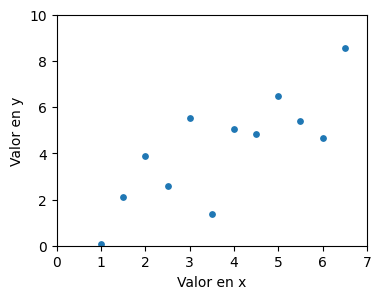

In [63]:
# Cargo los datos
x = np.array([1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5])
y = np.array([0.0913, 2.0914, 3.8927, 2.6026, 5.5346, 1.3751, 5.0639, 4.8378, 6.4789, 5.4043, 4.6668, 8.55299])

# Grafico los datos
plt.figure(figsize=(4,3), dpi=100)
plt.scatter(x, y, s=15)
plt.xlabel("Valor en x")
plt.ylabel("Valor en y")
plt.ylim(0,10)
plt.xlim(0,7)

Visualmente la variables si podrían tener una relación lineal, ya que parece que y crece de forma constante conforme x se incrementa.

## Literal (b)
Asumiendo que $y$ se relaciona linealmente con $x$, utilice el método de los mínimos cuadrados para encontrar la recta que mejor se ajusta a los datos. Piense que se puede expresar $y$ como la combinación lineal $y = \alpha_0 + \alpha_1x$.

### Ajuste lineal

El modelo lineal ajustará la ecuación $\hat{y} = \alpha_0 + \alpha_1 x$

La función de pérdida es $P(\alpha_0, \alpha_1) = \sum_{i}^{n}(y_i - \hat{y_i})^2$

Las derivadas parciales de la funcion de perdida con respecto a los parametros se calculan derivando lo que esta al interior de la sumatoria y utilizando la regla de la cadena:

$$
\begin{split}
    \frac{\partial P}{\partial \alpha_0} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_0}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) (1) \right)
        \\
    \frac{\partial P}{\partial \alpha_1} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_1}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) (x_i) \right)
        \\
\end{split}
$$

El gradiente de la funcion de perdida es 
$$
\nabla P =
\begin{bmatrix}
    \frac{\partial P}{\partial \alpha_0} \\
    \frac{\partial P}{\partial \alpha_1}
\end{bmatrix} =
\begin{bmatrix}
    \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \right) \\
    \sum_{i}^{n} \left( -2x_i(y_i - \hat{y_i}) \right)
\end{bmatrix}
$$

Se decide deja expresado el gradiente en terminos de los parámetros, pero también de los $\hat{y_i}$. Esto no representa un problema ya que dichos valores si se tendrán calculados y el resultado de hacer esto es una expresión más compacta del gradiente.


In [64]:
# Funcion para ajustar
def funcionLineal(x, param):
    a0, a1 = param
    return( a0 + a1 * x)

# Gradiente de la funcion de perdida
def gradienteLineal(x, y, yPred, param):
    # Se calculan derivadas parciales usando la regla de la cadena
    del_y = -2 * (y - yPred)
    del_a0 = np.sum(del_y)
    del_a1 = np.sum(del_y * x)
    return(np.array([del_a0, del_a1]))

# Creo el modelo lineal
modeloLineal = Modelo(funcionLineal, gradienteLineal, 2)

La ecuacion de la recta es y = 0.351 + 1.031 * x


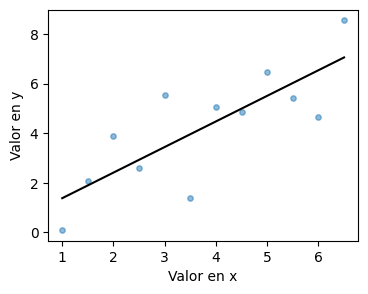

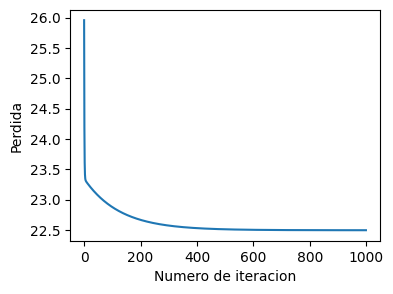

In [65]:
# Ejecuto el modelo lineal
param = modeloLineal.correrModelo(x, y)
a0, a1 = np.around(param, 3)
print(f'La ecuacion de la recta es y = {a0} + {a1} * x' )

## Literal (c)
Encuentre el vector $y^*$ que aproxima $y$

In [66]:
# Recupero los valores y que predice el modelo para cada entrada x
yPred = modeloLineal.yPred
print(f'Vector prediccion y* = {np.around(yPred,3)}')

Vector prediccion y* = [1.382 1.898 2.413 2.929 3.445 3.96  4.476 4.991 5.507 6.022 6.538 7.054]


## Literal (d)
Encuentre el vector de error $\epsilon = y - y^*$. ¿Cuál es su magnitud?

In [67]:
# Recupero el error y la norma del error calculados en el modelo
error = modeloLineal.error
magnitud = modeloLineal.errorNorm
print(f'Vector error e = y - y* = {np.around(error,3)}')
print(f'Magnitud del vector error, |e| = {round(magnitud,3)}')

Vector error e = y - y* = [-1.291  0.193  1.479 -0.326  2.09  -2.585  0.588 -0.154  0.972 -0.618
 -1.871  1.499]
Magnitud del vector error, |e| = 4.743


# Ejercicio 2
En el archivo de datos $cars.csv$ tiene datos de la distancia que le toma parar a un vehículo desde determinada velocidad.

## Literal (a)
Si $y$ es la distancia (variable dist) y $x$ es la velocidad (variable speed), encuentre los coeficientes del modelo $y=\alpha_0 + \alpha_1 x$, calcule la norma del error.

La ecuacion de la recta es y = -13.608 + 3.701 * x
La norma del error es = 106.935


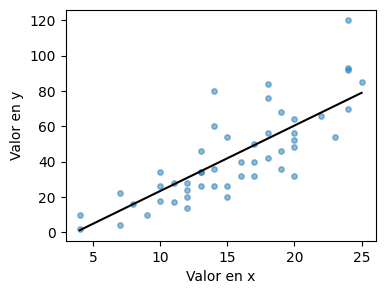

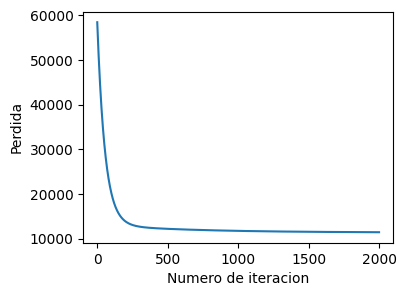

In [68]:
# Cargo los datos desde el archivo csv
carsDF = pd.read_csv("./data/cars.csv");
x = carsDF["speed"]
y = carsDF["dist"]

# Ejecuto el modelo lineal con los nuevos datos
param = modeloLineal.correrModelo(x, y, nmax = 2000, gamma = 7.5*10**-5)
a0, a1 = np.around(param, 3)
print(f'La ecuacion de la recta es y = {a0} + {a1} * x' )
print(f'La norma del error es = {round(modeloLineal.errorNorm, 3)}')

## Literal (b)
Encuentre los coeficientes del modelo  $y=\alpha_0 + \alpha_1 x + \alpha_2 x^2$, calcule la magnitud del error.

### Ajuste cuadrático


El modelo cuadrático ajustará la ecuación $\hat{y} = \alpha_0 + \alpha_1 x + \alpha_2 x^2$

La función de pérdida es $P(\alpha_0, \alpha_1, \alpha_2) = \sum_{i}^{n}(y_i - \hat{y_i})^2$

Las derivadas parciales de la funcion de perdida con respecto a los parametros son:

$$
\begin{split}
    \frac{\partial P}{\partial \alpha_0} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_0}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) (1) \right)
        \\
    \frac{\partial P}{\partial \alpha_1} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_1}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) (x_i) \right)
        \\
    \frac{\partial P}{\partial \alpha_2} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_2}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) (x_i^2) \right)
\end{split}
$$

El gradiente de la funcion de perdida es
$$
\nabla P = \left[ \frac{\partial P}{\partial \alpha_0}, \frac{\partial P}{\partial \alpha_1}, \frac{\partial P}{\partial \alpha_2} \right]
$$

Las derivadas parciales son las calculadas arriba

In [69]:
# Funcion para ajustar
def funcionCuad(x, param):
    a0, a1, a2 = param
    return( a0 + a1 * x + a2 * x**2)

# Gradiente de la funcion de perdida
def gradienteCuad(x, y, yPred, param):
    # Se calculan derivadas parciales usando la regla de la cadena
    del_y = -2 * (y - yPred)
    del_a0 = np.sum(del_y * 1)
    del_a1 = np.sum(del_y * x)
    del_a2 = np.sum(del_y * x**2)
    return(np.array([del_a0, del_a1, del_a2]))

# Creo el modelo cuadratico
modeloCuad = Modelo(funcionCuad, gradienteCuad, 3)

La ecuacion de la curva es y = 1.002 + 0.984 * x + 0.1 * x^2
La norma del error es = 104.105


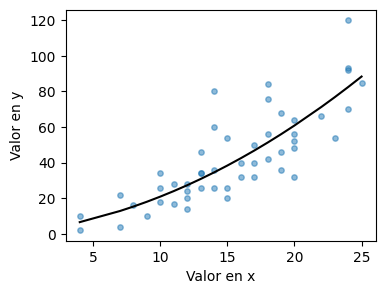

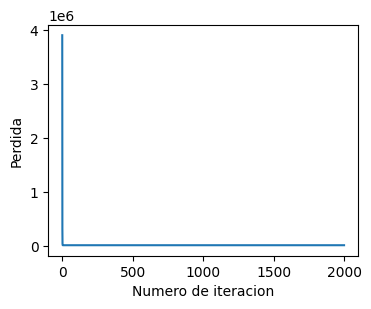

In [70]:
# Ejecuto el modelo cuadratico
param = modeloCuad.correrModelo(x, y, nmax = 2000, gamma = 7.5 * 10**-8)
a0, a1, a2 = np.around(param, 3)
print(f'La ecuacion de la curva es y = {a0} + {a1} * x + {a2} * x^2')
print(f'La norma del error es = {round(modeloCuad.errorNorm, 3)}')

## Literal (c)
En base a los cálculos del error de los dos modelos anteriores, diga cuál de ellos es mejor.

El error del modelo cuadratico tuvo magnitud 104.105 mientras que el del modelo lineal fue 106.935, por lo que el modelo cuadratico es mejor.

# Ejercicio 3
Para el conjunto de datos $nolineal.csv$ utilice el método de los mínimos cuadrados para encontrar los parámetros del modelo $y = \alpha_0 sin(\alpha_1 + \alpha_2 x) + \beta_0 cos(\beta_1 + \beta_2 x)$

### Ajuste sinusoidal

El modelo sinusoidal ajustará la ecuación $\hat{y} = \alpha_0 \sin(\alpha_1 + \alpha_2x) + \beta_0 \cos(\beta_1 + \beta_2x)$

La función de pérdida es $P(\alpha_0, \alpha_1, \alpha_2, \beta_0, \beta_1, \beta_2) = \sum_{i}^{n}(y_i - \hat{y_i})^2$

Las derivadas parciales de la funcion de perdida con respecto a los parametros son:

$$
\begin{split}
    \frac{\partial P}{\partial \alpha_0} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_0}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot \sin(\alpha_1 + \alpha_2 x_i) \right)
        \\
    \frac{\partial P}{\partial \alpha_1} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_1}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot \alpha_0 \cos(\alpha_1 + \alpha_2 x_i) \right)
        \\
    \frac{\partial P}{\partial \alpha_2} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \alpha_2}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot \alpha_0 x_i \cos(\alpha_1 + \alpha_2 x_i) \right)
        \\
    \frac{\partial P}{\partial \beta_0} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \beta_0}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot \cos(\beta_1 + \beta_2 x_i) \right)
        \\
    \frac{\partial P}{\partial \beta_1} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \beta_1}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot (-\beta_0 \sin(\beta_1 + \beta_2x_i)) \right)
        \\
    \frac{\partial P}{\partial \beta_2} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \beta_2}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot (-\beta_0 x_i \sin(\beta_1 + \beta_2x_i)) \right)
\end{split}
$$

El gradiente de la funcion de perdida es:
$$
\nabla P = \left[ \frac{\partial P}{\partial \alpha_0}, \frac{\partial P}{\partial \alpha_1}, \frac{\partial P}{\partial \alpha_2}, \frac{\partial P}{\partial \beta_0}, \frac{\partial P}{\partial \beta_1}, \frac{\partial P}{\partial \beta_2} \right]
$$


In [71]:
# Funcion para ajustar
def funcionOnda(x, param):
    a0, a1, a2, b0, b1, b2 = param
    return( a0*np.sin(a1+a2*x) + b0*np.cos(b1+b2*x) )

# Gradiente de la funcion de perdida
def gradienteOnda(x, y, yPred, param):
    a0, a1, a2, b0, b1, b2 = param
    # Se calculan derivadas parciales usando la regla de la cadena
    del_y = - 2 * (y - yPred)
    del_a0 = np.sum(del_y * (np.sin(a1 + a2*x)))
    del_a1 = np.sum(del_y * (a0 * np.cos(a1 + a2*x)))
    del_a2 = np.sum(del_y * (a0 * np.cos(a1 + a2*x) * x))
    del_b0 = np.sum(del_y * (np.cos(b1 + b2*x)))
    del_b1 = np.sum(del_y * (- b0 * np.sin(b1 + b2*x)))
    del_b2 = np.sum(del_y * (- b0 * np.sin(b1 + b2*x) * x))   
    return(np.array([del_a0, del_a1, del_a2, del_b0, del_b1, del_b2]))

# Creo el modelo sinusoidal
modeloOnda = Modelo(funcionOnda, gradienteOnda, 6)

La ecuacion de la curva es y = 4.309*sin(-3.506 + 1.989*x) + 0.132*cos(2.956 + 0.586*x
La norma del error es = 19.445


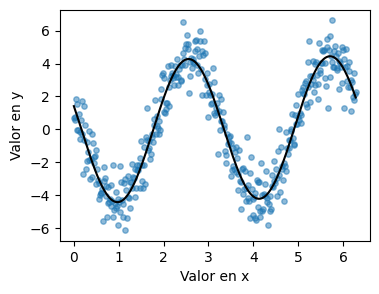

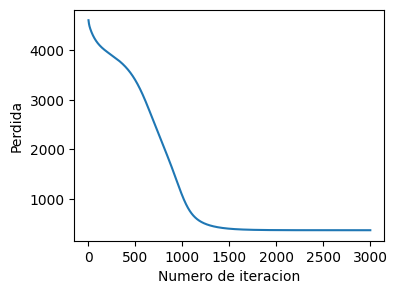

In [72]:
# Cargo los datos
nolinealDF = pd.read_csv("./data/nolineal.csv");
x = nolinealDF["x"]
y = nolinealDF["y"]

# Ejecuto el modelo sinusoidal
param = modeloOnda.correrModelo(x,y, nmax = 3000, gamma = 1 * 10**-5)
a0, a1, a2, b0, b1, b2 = np.around(param, 3)
print(f'La ecuacion de la curva es y = {a0}*sin({a1} + {a2}*x) + {b0}*cos({b1} + {b2}*x')
print(f'La norma del error es = {round(modeloOnda.errorNorm, 3)}')

# Ejercicio 4
Para el conjunto de datos $nolineal2.csv$ utilice el método de los mínimos cuadrados para encontrar los parámetros del modelo $y = \beta_0 e^{\beta_1 + \beta_2 x}$. Haga un gráfico de la curva del modelo junto con los datos. Calcule la magnitud del error.

### Ajuste exponencial


El modelo exponencial ajustará la ecuación $\hat{y} = \beta_0 e^{\beta_1 + \beta_2 x}$

La función de pérdida es $P(\beta_0, \beta_1, \beta_2) = \sum_{i}^{n}(y_i - \hat{y_i})^2$

Las derivadas parciales de la funcion de perdida con respecto a los parametros son:

$$
\begin{split}
    \frac{\partial P}{\partial \beta_0} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \beta_0}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot e^{\beta_1 + \beta_2 x_i}) \right)
        \\
    \frac{\partial P}{\partial \beta_1} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \beta_1}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot \beta_0 e^{\beta_1 + \beta_2 x_i} \right)
        \\
    \frac{\partial P}{\partial \beta_2} 
        &= \frac{\partial P}{\partial \hat{y}} \frac{\partial \hat{y}}{\partial \beta_2}
        = \sum_{i}^{n} \left( -2(y_i - \hat{y_i}) \cdot \beta_0 e^{\beta_1 + \beta_2 x_i} x_i \right)
\end{split}
$$

El gradiente de la funcion de perdida es 
$$
\nabla P = \left[ \frac{\partial P}{\partial \beta_0}, \frac{\partial P}{\partial \beta_1}, \frac{\partial P}{\partial \beta_2} \right]
$$

In [73]:
# Funcion exponencial para ajustar
def funcionExp(x, param):
    b0, b1, b2 = param
    return( b0 * np.exp(b1 + b2*x))

# Gradiente de la funcion de perdida
def gradienteExp(x, y, yPred, param):
    b0, b1, b2 = param
    del_y = - 2 * (y - yPred)
    del_b0 = np.sum(del_y * np.exp(b1 + b2*x))
    del_b1 = np.sum(del_y * b0*np.exp(b1 + b2*x))
    del_b2 = np.sum(del_y * b0*np.exp(b1 + b2*x)*x)
    return(np.array([del_b0, del_b1, del_b2]))

# Creo el modelo
modeloExp = Modelo(funcionExp, gradienteExp, 3)

La ecuacion de la curva es y = 0.803 e^(0.737 + -0.461*x)
La norma del error es = 33.228


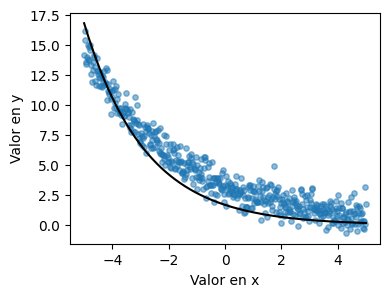

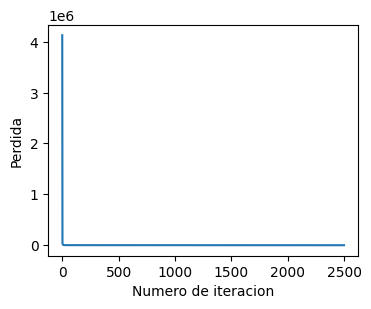

In [74]:
# Cargo los datos
nolineal2DF = pd.read_csv("./data/nolineal2.csv");
x = nolineal2DF["x"]
y = nolineal2DF["y"]

# Ejecuto el modelo Exponencial
param = modeloExp.correrModelo(x,y,nmax=2500, gamma=5 * 10**-8)
b0, b1, b2 = np.around(param, 3)
print(f'La ecuacion de la curva es y = {b0} e^({b1} + {b2}*x)')
print(f'La norma del error es = {round(modeloExp.errorNorm, 3)}')